In [538]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import plotly.offline as py 
import plotly.graph_objs as go
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib widget
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

In [539]:
df = pd.read_csv("BTC-Daily.csv")

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


In [541]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [542]:
df.shape

(2651, 9)

In [543]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


In [544]:
missing_values = df.isnull().sum()
missing_per = (missing_values/df.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
unix,0,0.0
date,0,0.0
symbol,0,0.0
open,0,0.0
high,0,0.0
low,0,0.0
close,0,0.0
Volume BTC,0,0.0
Volume USD,0,0.0


In [545]:
import pandas as pd

df['date'] = pd.to_datetime(df['date']).dt.date


In [546]:
#drop irrelevant columns
df = df.drop(['unix', 'symbol'], axis=1)
df.head()


,date,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,2022-02-26,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,2022-02-25,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [547]:
df['date'] = pd.to_datetime(df['date'])

# Create a new column for the year
df['year'] = df['date'].dt.year

# Create a new column for the month
df['month'] = df['date'].dt.month

# Create a new column for the day
df['day'] = df['date'].dt.day

one of the models in placed here, since form dowm here deleted the data from before 2020 and in this model we needed them.

In [548]:
new_df2 = df.copy()
new_df2['is_quarter_end'] = np.where(new_df2['month'] % 3 == 0, 1, 0)
new_df2['open-close'] = new_df2['open'] - new_df2['close']
new_df2['low-high'] = new_df2['low'] - new_df2['high']
new_df2['target'] = np.where(new_df2['close'].shift(-1) > new_df2['close'], 1, 0)
a = np.where(new_df2['close'].shift(-1) == new_df2['close'], 1, 0)

features = new_df2[['open-close', 'low-high', 'is_quarter_end']]
target = new_df2['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.20, random_state=2022)

print(X_train.shape, X_valid.shape)

models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    models[i].max_iter = 10000
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:, 1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:, 1]))
    print()


(2120, 3) (531, 3)
LogisticRegression(max_iter=10000) : 
Training Accuracy :  0.9973572616059663
Validation Accuracy :  0.9945065864183511

DecisionTreeClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  0.9696655689302749

KNeighborsClassifier() : 
Training Accuracy :  0.9989174108345092
Validation Accuracy :  0.9899287417669771



In [549]:
df=df[df['date'] >= '2020-01-01']

## EDA

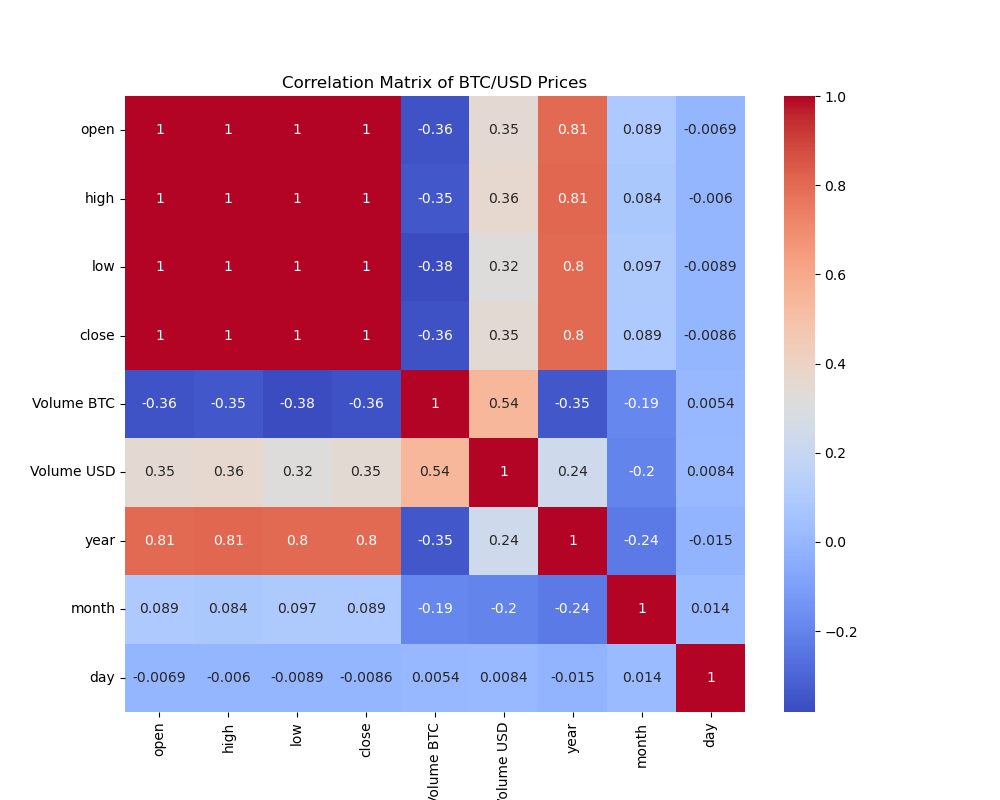

In [550]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of BTC/USD Prices')
plt.show()

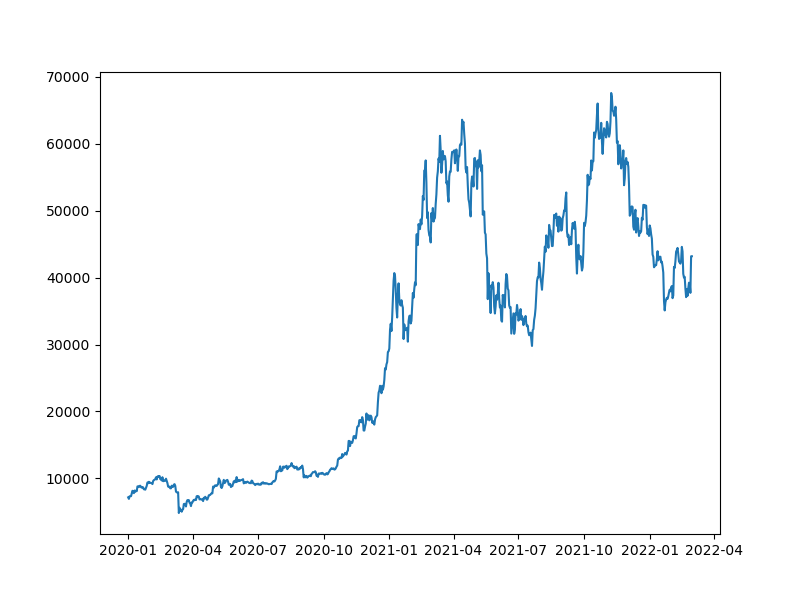

In [551]:
plt.close()

plt.figure(1,figsize=(8,6))

plt.plot(df['date'],df['close'])

plt.show()

In [552]:
def triple_plot(x, title, c): 
    fig, ax = plt.subplots(3, 1, figsize=(7, 7), sharex=True) 
    sns.histplot(x, kde=True, ax=ax[0], color=c) 
    ax[0].set(xlabel=None) 
    ax[0].set_title('Histogram + KDE') 
    sns.boxplot(x, ax=ax[1], color=c) 
    ax[1].set(xlabel=None) 
    ax[1].set_title('Boxplot') 
    sns.violinplot(x, ax=ax[2], color=c) 
    ax[2].set(xlabel=None) 
    ax[2].set_title('Violin plot') 
    fig.suptitle(title, fontsize=30) 
    plt.tight_layout(pad=3.0) 
    plt.show()

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



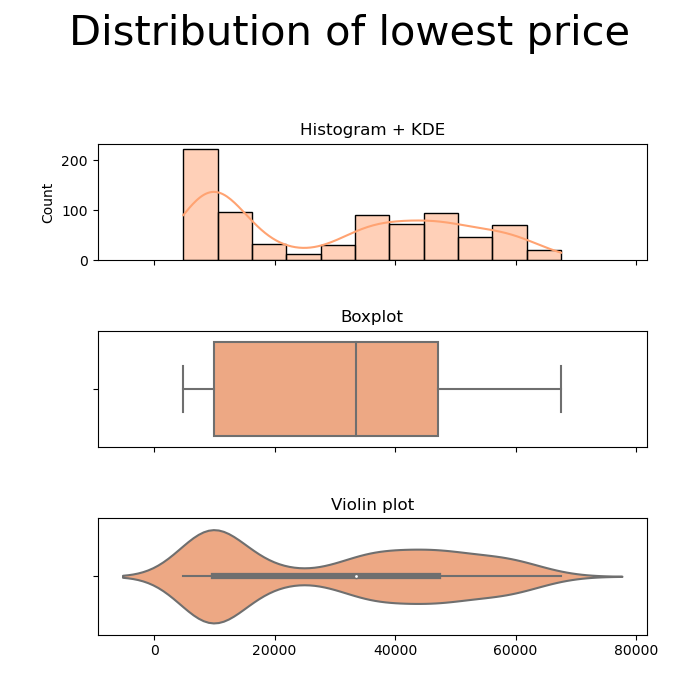

In [553]:
triple_plot(df['close'],'Distribution of lowest price',custom_colors[3])

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



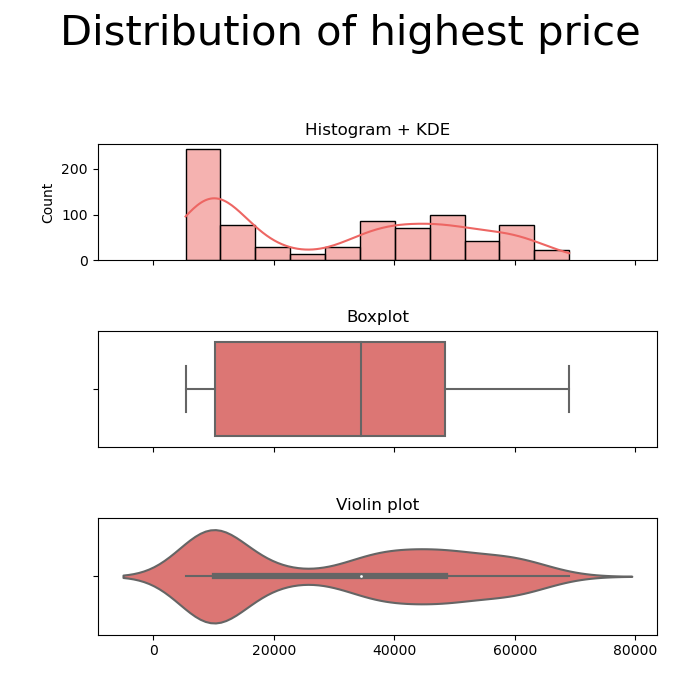

In [554]:
triple_plot(df['high'],'Distribution of highest price',custom_colors[2])

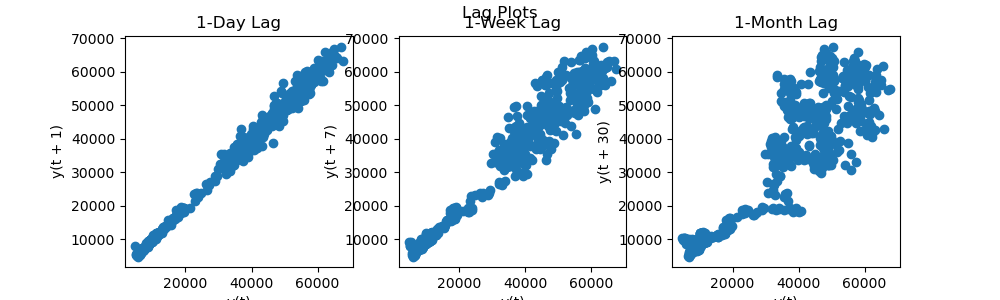

In [555]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 3))
plt.suptitle('Lag Plots', fontsize=12)

# 1-Day Lag
plt.subplot(1, 3, 1)
pd.plotting.lag_plot(df['close'], lag=1)
plt.title('1-Day Lag')

# 1-Week Lag (assuming 7 days in a week)
plt.subplot(1, 3, 2)
pd.plotting.lag_plot(df['close'], lag=7)
plt.title('1-Week Lag')

# 1-Month Lag (assuming 30 days in a month)
plt.subplot(1, 3, 3)
pd.plotting.lag_plot(df['close'], lag=30)
plt.title('1-Month Lag')

plt.show()



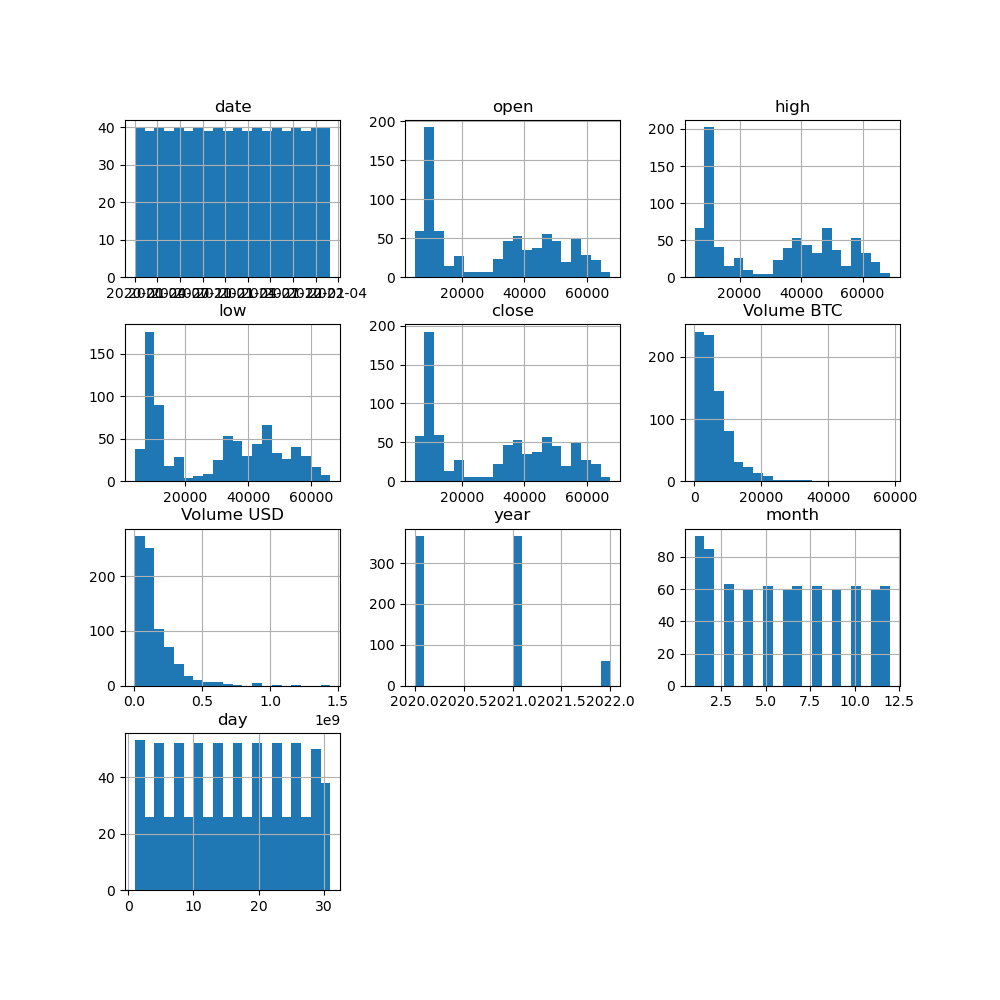

In [556]:
df.hist(bins=20, legend=False, figsize=(10, 10))
plt.show()

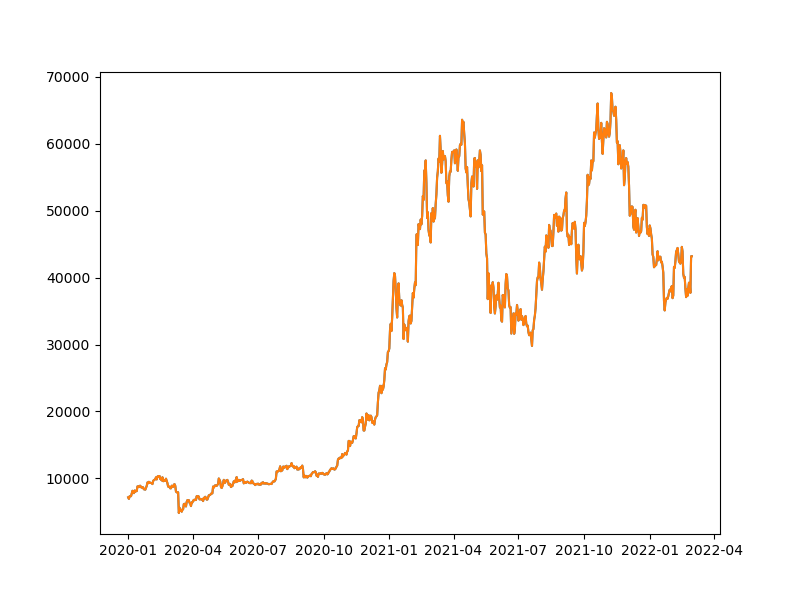

In [557]:
plt.close()

plt.figure(1,figsize=(12,6))

plt.plot(df['date'],df['close'])

plt.show()

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Lenovo\anaconda3\lib\site

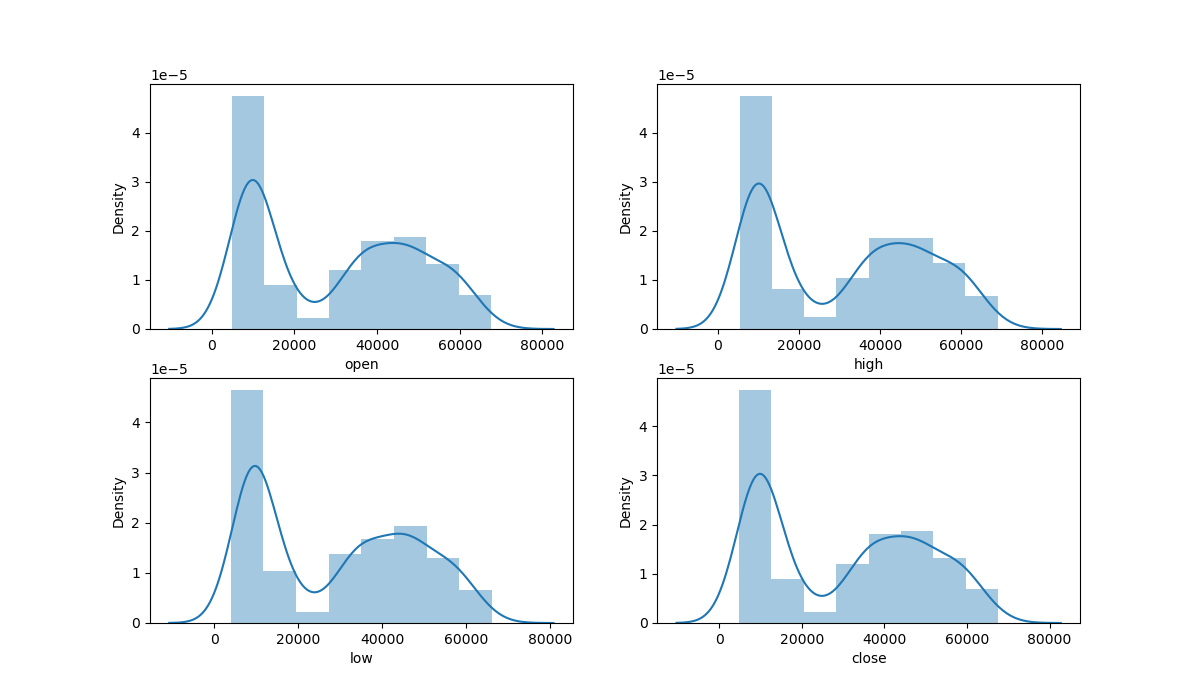

In [558]:
features = ['open', 'high', 'low', 'close']
plt.close()
plt.subplots(figsize=(12,7))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.distplot(df[col])
plt.show()


## model


In [559]:
new_df = df.copy()

In [560]:
new_df['is_quarter_end'] = np.where(new_df['month']%3==0,1,0)
new_df.head()

,date,open,high,low,close,Volume BTC,Volume USD,year,month,day,is_quarter_end
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022,3,1,1
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022,2,28,0
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022,2,27,0
3,2022-02-26,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022,2,26,0
4,2022-02-25,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022,2,25,0


In [561]:
new_df['open-close']  = new_df['open'] - new_df['close']
new_df['low-high']  = new_df['low'] - new_df['high']
new_df['target'] = np.where(new_df['close'].shift(-1) > new_df['close'], 1, 0)

In [562]:
a=np.where(new_df['close'].shift(-1) == new_df['close'], 1, 0)

In [563]:
features = new_df[['open-close', 'low-high', 'is_quarter_end']]
target = new_df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.20, random_state=2022)
print(X_train.shape, X_valid.shape)

(632, 3) (159, 3)


In [564]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
  models[i].max_iter=10000
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression(max_iter=10000) : 
Training Accuracy :  0.9996485943775101
Validation Accuracy :  0.9993386243386243

DecisionTreeClassifier() : 
Training Accuracy :  1.0
Validation Accuracy :  0.9920634920634921

KNeighborsClassifier() : 
Training Accuracy :  0.9991114457831326
Validation Accuracy :  0.998181216931217



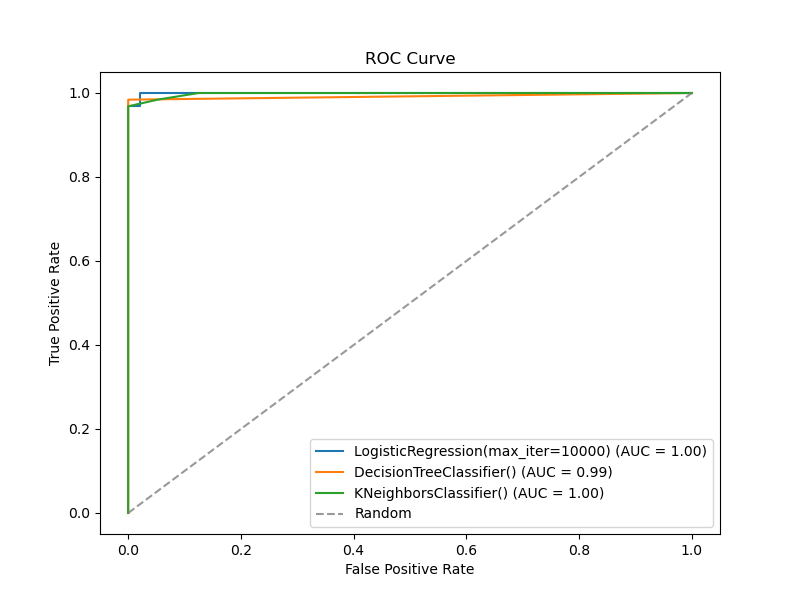

In [565]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for model in models:
    fpr, tpr, _ = roc_curve(Y_valid, model.predict_proba(X_valid)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random', alpha=0.8)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

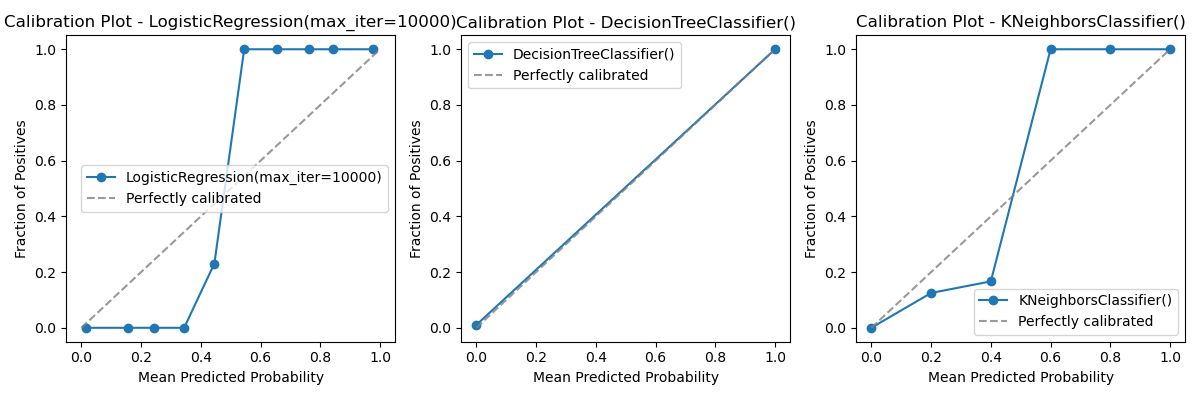

In [566]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(12, 4))

for i, model in enumerate(models, 1):
    plt.subplot(1, 3, i)
    prob_true, prob_pred = calibration_curve(Y_valid, model.predict_proba(X_valid)[:, 1], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'{model}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated', alpha=0.8)
    plt.title(f'Calibration Plot - {model}')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.legend()

plt.tight_layout()
plt.show()


In [567]:
X = df[['open', 'high', 'low', 'Volume BTC', 'Volume USD']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9990274347615905


In [568]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

train_mask = ((df['year'] == 2020) | ((df['year'] == 2021) & (df['month'] < 10)))
test_mask = ((df['year'] == 2021) & (df['month'] >= 10)) | (df['year'] == 2022)

X = df.drop(['date', 'close'], axis=1)
y = df['close']

X_train, X_test, y_train, y_test = X[train_mask], X[test_mask], y[train_mask], y[test_mask]

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, enable_categorical=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)


Accuracy: 0.978764873279202
RMSE: 1304.8541712797578


In [569]:
mae = np.mean(np.abs(y_test - y_pred))
print('MAE:', mae)


MAE: 1009.5633151726973


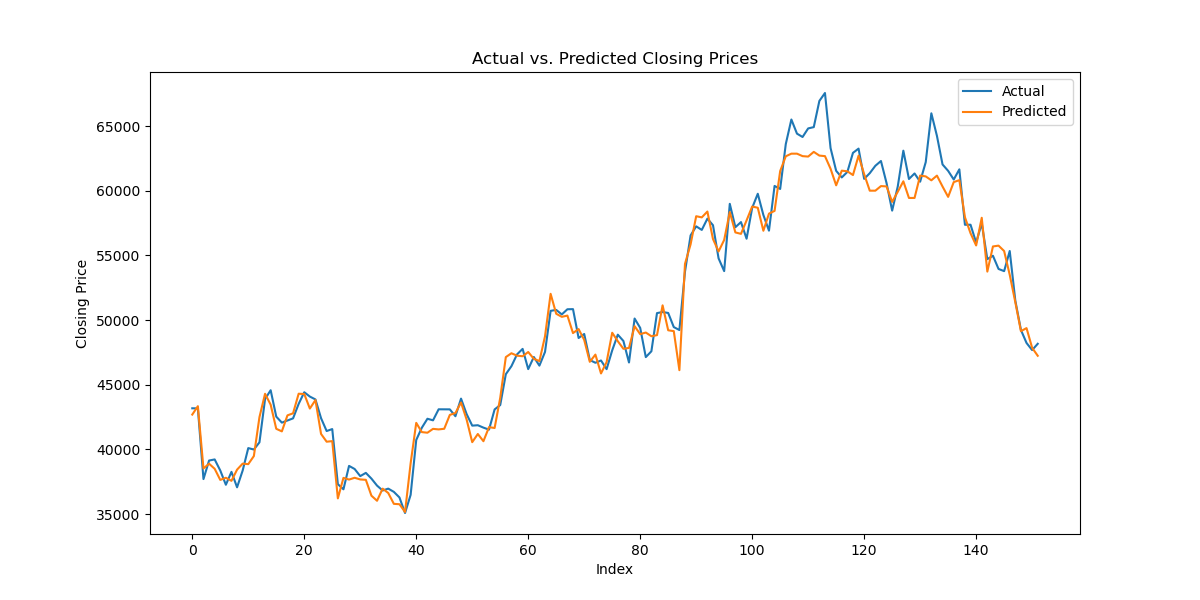

In [570]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [571]:
y_train.index.shape

(639,)

In [572]:
X_train

,open,high,low,Volume BTC,Volume USD,year,month,day
152,41537.56,44117.74,41427.87,2614.504209,1.146053e+08,2021,9,30
153,41024.21,42595.93,40750.00,1804.778085,7.497572e+07,2021,9,29
154,42154.87,42778.93,40888.00,2246.853580,9.223109e+07,2021,9,28
155,43162.82,44377.70,42130.00,1936.649572,8.170688e+07,2021,9,27
156,42699.10,43956.38,40808.00,1659.784662,7.171055e+07,2021,9,26
...,...,...,...,...,...,...,...,...
786,7356.05,7495.00,7310.00,2707.273855,1.991660e+07,2020,1,5
787,7332.58,7396.10,7256.03,3256.737353,2.391904e+07,2020,1,4
788,6945.70,7402.31,6853.53,8072.729087,5.924503e+07,2020,1,3
789,7174.70,7184.94,6900.00,3972.707954,2.761254e+07,2020,1,2


In [573]:
X_test

,open,high,low,Volume BTC,Volume USD,year,month,day
0,43221.71,43626.49,43185.48,49.006289,2.116360e+06,2022,3,1
1,37717.10,44256.08,37468.99,3160.618070,1.364723e+08,2022,2,28
2,39146.66,39886.92,37015.74,1701.817043,6.418008e+07,2022,2,27
3,39242.64,40330.99,38600.00,912.724087,3.573010e+07,2022,2,26
4,38360.93,39727.97,38027.61,2202.851827,8.642149e+07,2022,2,25
...,...,...,...,...,...,...,...,...
147,49283.89,51914.68,49075.00,2206.596443,1.136423e+08,2021,10,5
148,48231.04,49530.53,46900.00,2737.780533,1.348142e+08,2021,10,4
149,47644.63,49225.55,47119.87,1164.602969,5.617571e+07,2021,10,3
150,48185.61,48361.83,47468.15,1361.844027,6.494062e+07,2021,10,2


In [574]:
closed=df[['date','close']]

In [575]:
price=closed[closed['date'] >= '2020-01-01']

In [576]:
x=price['close']

x[0:5]

0    43185.48
1    43178.98
2    37712.68
3    39146.66
4    39231.64
Name: close, dtype: float64

In [577]:
x


0      43185.48
1      43178.98
2      37712.68
3      39146.66
4      39231.64
         ...   
786     7356.70
787     7344.48
788     7338.91
789     6950.56
790     7178.68
Name: close, Length: 791, dtype: float64

In [578]:
x.shape

(791,)

In [579]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(np.array(x).reshape(-1,1))

In [580]:
df

,date,open,high,low,close,Volume BTC,Volume USD,year,month,day
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022,3,1
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022,2,28
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022,2,27
3,2022-02-26,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022,2,26
4,2022-02-25,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022,2,25
...,...,...,...,...,...,...,...,...,...,...
786,2020-01-05,7356.05,7495.00,7310.00,7356.70,2707.273855,1.991660e+07,2020,1,5
787,2020-01-04,7332.58,7396.10,7256.03,7344.48,3256.737353,2.391904e+07,2020,1,4
788,2020-01-03,6945.70,7402.31,6853.53,7338.91,8072.729087,5.924503e+07,2020,1,3
789,2020-01-02,7174.70,7184.94,6900.00,6950.56,3972.707954,2.761254e+07,2020,1,2


In [581]:
x = x[::-1]

In [582]:

X_train=x[0:632]
X_test=x[632:]


In [583]:
X_train.shape

(632, 1)

In [584]:
X_train

array([[0.03726259],
       [0.03362532],
       [0.03981738],
       [0.03990619],
       [0.04010104],
       [0.04657517],
       [0.05289351],
       [0.05106675],
       [0.04727736],
       [0.05354708],
       [0.05061679],
       [0.05324031],
       [0.05203251],
       [0.06332173],
       [0.06326003],
       [0.0616812 ],
       [0.06459076],
       [0.06484428],
       [0.06146515],
       [0.06032623],
       [0.06180461],
       [0.06081668],
       [0.05639223],
       [0.05708885],
       [0.0556119 ],
       [0.05977311],
       [0.06462121],
       [0.07268055],
       [0.07091357],
       [0.07427501],
       [0.07153015],
       [0.07231654],
       [0.0715547 ],
       [0.07089619],
       [0.06884381],
       [0.07616316],
       [0.07833497],
       [0.0791129 ],
       [0.08068472],
       [0.08502116],
       [0.07985576],
       [0.08653605],
       [0.08780843],
       [0.08589332],
       [0.08805174],
       [0.08064932],
       [0.08085835],
       [0.077

In [585]:
X_test

array([[0.60600204],
       [0.60398808],
       [0.61168197],
       [0.59549952],
       [0.57730981],
       [0.58518483],
       [0.62172226],
       [0.69088065],
       [0.68313064],
       [0.69190222],
       [0.70794579],
       [0.74396534],
       [0.80526579],
       [0.78042114],
       [0.78312549],
       [0.79938432],
       [0.79520732],
       [0.83937773],
       [0.81562496],
       [0.83761346],
       [0.83756611],
       [0.90590081],
       [0.89335101],
       [0.90401329],
       [0.91191669],
       [0.94710569],
       [0.97498793],
       [0.91486308],
       [0.89067902],
       [0.90082103],
       [0.8939872 ],
       [0.92892602],
       [0.88470842],
       [0.85501455],
       [0.88892639],
       [0.91617293],
       [0.91028476],
       [0.90115077],
       [0.89418953],
       [0.93145435],
       [0.92620413],
       [0.9027103 ],
       [0.89592845],
       [0.90406862],
       [0.93209213],
       [1.        ],
       [0.99022152],
       [0.957

In [586]:
X_test.shape

(159, 1)

In [587]:
x

array([[0.03726259],
       [0.03362532],
       [0.03981738],
       [0.03990619],
       [0.04010104],
       [0.04657517],
       [0.05289351],
       [0.05106675],
       [0.04727736],
       [0.05354708],
       [0.05061679],
       [0.05324031],
       [0.05203251],
       [0.06332173],
       [0.06326003],
       [0.0616812 ],
       [0.06459076],
       [0.06484428],
       [0.06146515],
       [0.06032623],
       [0.06180461],
       [0.06081668],
       [0.05639223],
       [0.05708885],
       [0.0556119 ],
       [0.05977311],
       [0.06462121],
       [0.07268055],
       [0.07091357],
       [0.07427501],
       [0.07153015],
       [0.07231654],
       [0.0715547 ],
       [0.07089619],
       [0.06884381],
       [0.07616316],
       [0.07833497],
       [0.0791129 ],
       [0.08068472],
       [0.08502116],
       [0.07985576],
       [0.08653605],
       [0.08780843],
       [0.08589332],
       [0.08805174],
       [0.08064932],
       [0.08085835],
       [0.077

In [588]:

x1=[]
y1=[]
a=[]
b=0
for i in range(len(X_train)-10-1):
    a=X_train[i:i+10,0]
    b=X_train[i+10,0]
    x1.append(a)
    y1.append(b)

X_train1=np.array(x1)
y_train1=np.array(y1)

print(X_train1.shape)

x1=[]
y1=[]
a=[]
b=0
for i in range(len(X_test)-10-1):
    a=X_test[i:i+10,0]
    b=X_test[i+10,0]
    x1.append(a)
    y1.append(b)

X_test1=np.array(x1)
y_test1=np.array(y1)


print(X_test1.shape)

(621, 10)
(148, 10)


In [589]:
# [ tedad , andaze , feature  ]

X_train1=X_train1.reshape(621,10,1)
X_test1 = X_test1.reshape(148, 10, 1)


print(X_train1.shape)
print(X_test1.shape)

(621, 10, 1)
(148, 10, 1)


In [590]:
X_train1[0]

array([[0.03726259],
       [0.03362532],
       [0.03981738],
       [0.03990619],
       [0.04010104],
       [0.04657517],
       [0.05289351],
       [0.05106675],
       [0.04727736],
       [0.05354708]])

In [591]:
y_test1[0]

0.7079457942485753

In [592]:
X_test1[0]

array([[0.60600204],
       [0.60398808],
       [0.61168197],
       [0.59549952],
       [0.57730981],
       [0.58518483],
       [0.62172226],
       [0.69088065],
       [0.68313064],
       [0.69190222]])

In [593]:
model= Sequential()

model.add(LSTM(10,activation='relu',input_shape=(None,1)))
model.add(Dense(1))

model.compile(loss="mean_squared_error" , optimizer='adam')

In [594]:
h = model.fit(X_train1,y_train1, validation_data=(X_test1,y_test1),epochs=500,verbose=0)

In [595]:
train_predict=model.predict(X_train1)
test_predict=model.predict(X_test1)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 0s/step


((621, 1), (148, 1))

In [596]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train1.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test1.reshape(-1,1)) 

In [597]:
print("vaqeii: ",original_ytest[20])
print("robot:  ",test_predict[20])

vaqeii:  [60910.16]
robot:   [59158.9]


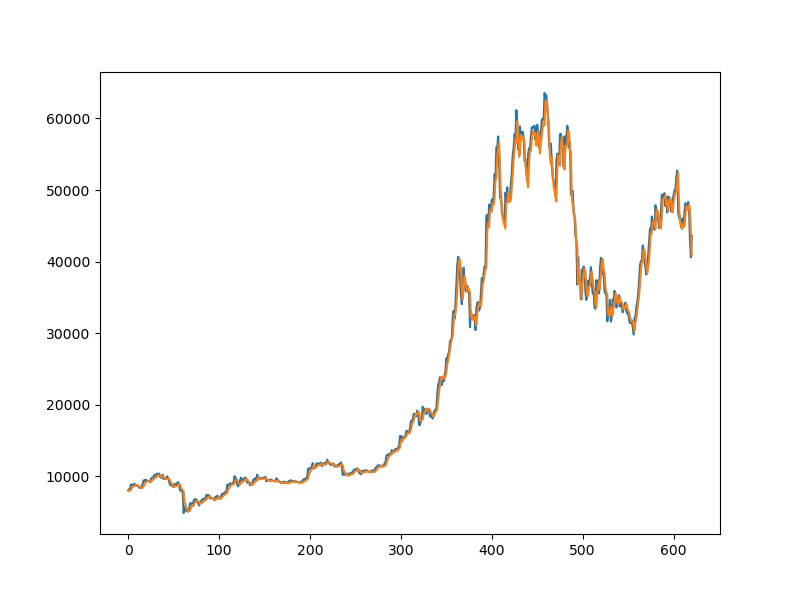

In [601]:
plt.close()
plt.figure(1,(8,6))
plt.plot(original_ytrain)
plt.plot(train_predict)
plt.show()

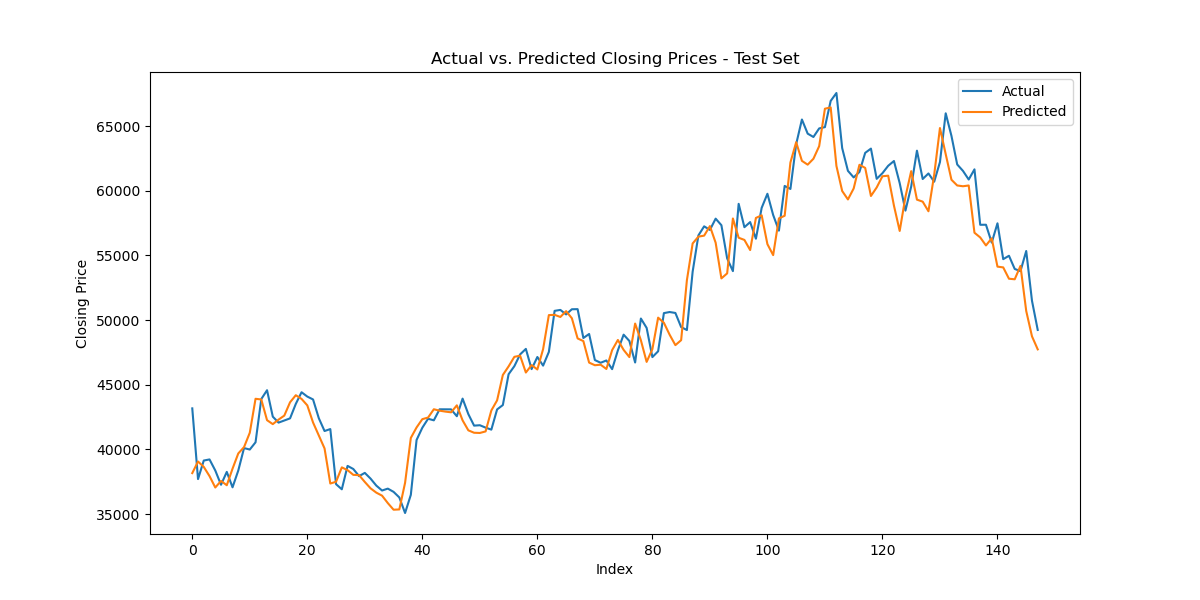

In [600]:
original_ytest_reversed = original_ytest[::-1]
test_predict_reversed = test_predict[::-1]


plt.close()
plt.figure(figsize=(12, 6)) 
plt.plot(original_ytest_reversed, label='Actual')
plt.plot(test_predict_reversed, label='Predicted')
plt.title('Actual vs. Predicted Closing Prices - Test Set')
plt.xlabel('Index')
plt.ylabel('Closing Price')


plt.legend()
plt.show()
